This notebook shows how to run GRAMS on tables related to pharmaceutical domain.

In [29]:
import glob, sys, orjson, warnings
from IPython.display import display_html, HTML
from omegaconf import OmegaConf
from tqdm.auto import tqdm
from grams.prelude import GRAMS, ROOT_DIR, DATA_DIR, I, WikidataSemanticModelHelper, fetch_tables
from sm.prelude import O, M

warnings.filterwarnings("ignore", module='pslpython.predicate')

In [6]:
cwd = ROOT_DIR / "examples/novartis"
grams = GRAMS(DATA_DIR, proxy=False)

load tables and ground-truth

In [42]:
tables = [I.LinkedTable.from_csv_file(infile) for infile in sorted(glob.glob(str(cwd / "tables/*.csv")))]
tbl2sms = {
    tbl.table.table_id: [
        O.SemanticModel.from_dict(o) 
        for o in orjson.loads(
            M.assert_not_null(
                M.get_latest_path(cwd / "ground-truth" / tbl.table.table_id / "version.json")
            ).read_bytes()
        )['semantic_models']]
    for tbl in tables
}

annotate the tables

In [47]:
annotations = [grams.annotate(table) for table in tqdm(tables)]

100%|██████████| 3/3 [00:01<00:00,  1.91it/s]


show results

,﻿Description,PUBMEDID,Dise,Gene,Tissue
0,Identification of 19 new risk loci and potenti...,28604728,Testicular germ cell tumor,AIFM3,prostate epithelium
1,A genetic variant near GATA3 implicated in inh...,28656603,Benign prostatic hyperplasia,GATA3,prostate epithelium
2,"Meta-analysis of GWAS of over 16,000 individua...",28540026,Autism spectrum disorder,52164,brain
3,GATA3 is a potential target for Benign prostat...,,Nodular hyperplasia of prostate gland,4172,prostate epithelium


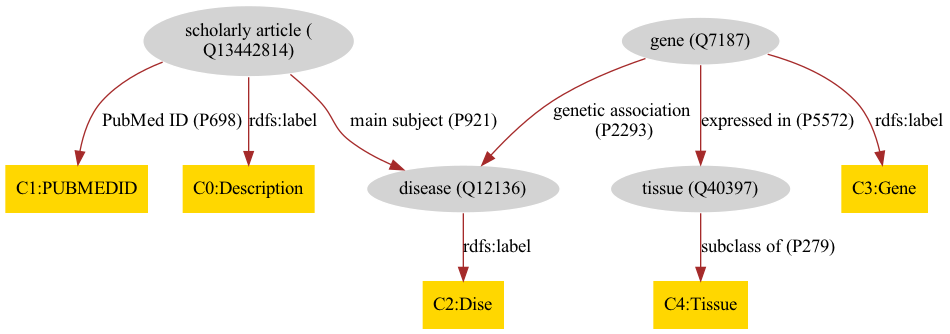

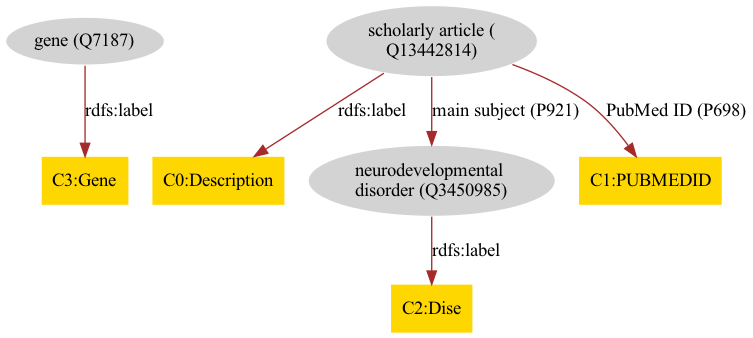

,Rank,Drug,Trade name,Type,Main indications,Company,Sales ( USD millions/year),∆ vs 2014
0,1,Adalimumab,Humira,Biologic,Rheumatoid arthritis,AbbVie Inc.,"14,012","1,469"
1,2,Ledipasvir/sofosbuvir,Harvoni,Small molecule,Hepatitis C,Gilead Sciences,"13,864","11,737"
2,3,Etanercept,Enbrel,Biologic,Rheumatoid arthritis,Amgen Pfizer,"8,697","4,009"
3,4,Infliximab,Remicade,Biologic,Crohn's Disease \nRheumatoid Arthritis,Johnson & Johnson,"8,355","1,487"
4,5,Rituximab,Mabthera Rituxan,Biologic,Lymphoma Leukemia Autoimmune disorders,Roche Genentech,"7,115","1,456"


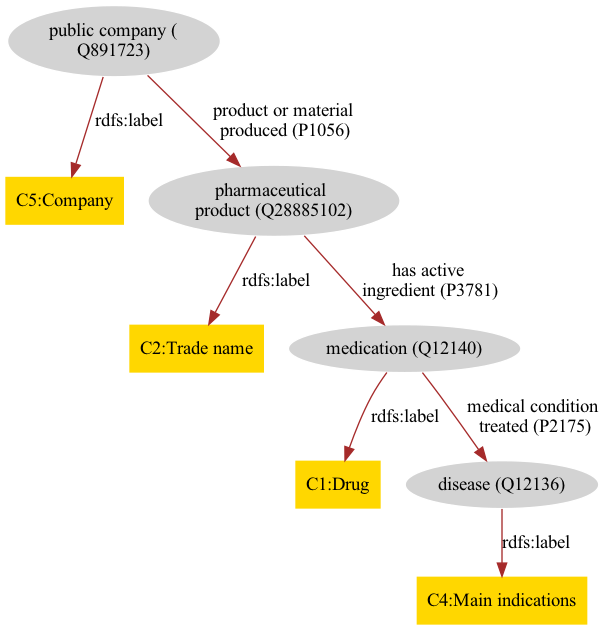

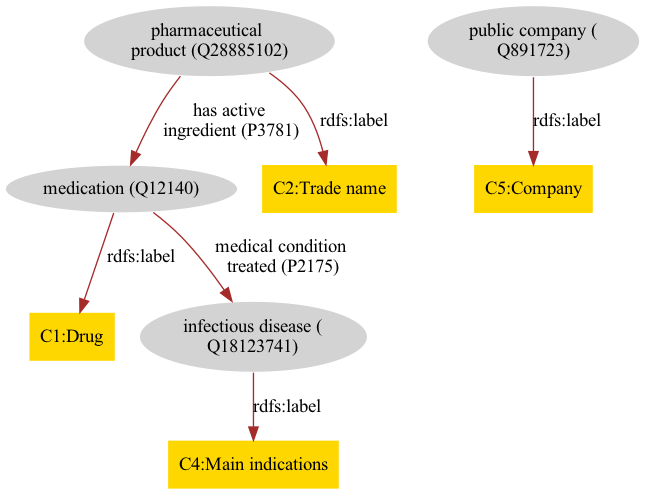

,Disease,Gene,Inheritance,Clinical Features
0,Achondroplasia,Fibroblast growth factor receptor 3 (FGR3),Autosomal dominant (normal parents can have an...,"Short limbs relative to trunk, prominent foreh..."
1,Cystic Fibrosis,Cystic fibrosis transmembrane regulator (CFTR),Autosomal Recessive (most common genetic disor...,Pancreatic insufficiency due to fibrotic lesio...
2,Duchenne Muscular Dystrophy,Dystrophin (DMD),X-linked recessive,"Gradual degeneration of skeletal muscle, impai..."


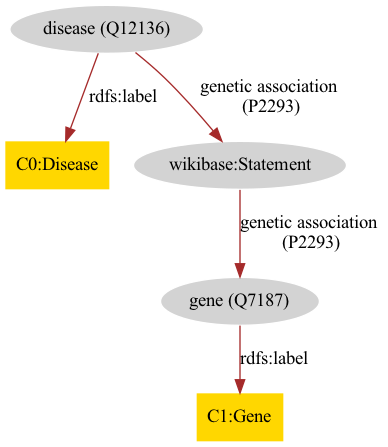

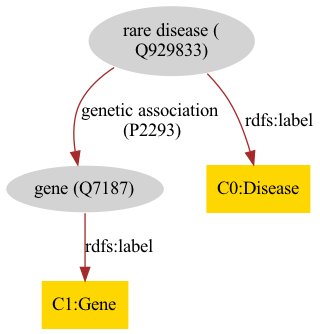

In [48]:
for i, tbl in enumerate(tables):
    display(HTML("<hr /><h3>Table</h3>"))
    display(tbl.table.df.head())
    display(HTML("<h3>Ground-truth models</h3>"))
    for sm in tbl2sms[tbl.table.table_id]:
        sm.draw()
        display(HTML(sm.print(env="browser")))
    display(HTML("<h3>Predicted models</h3>"))
    annotations[i].sm.draw()
    display(HTML(annotations[i].sm.print(env="browser")))